In [1]:
# import os
# from qiskit import QuantumCircuit, transpile
# from qiskit_aer import AerSimulator
# import numpy as np
# import matplotlib.pyplot as plt

# path = "base_test_mnist_784_f90/qasm/"

# def show_figure(pict: np.array, index=0):
#     plt.imshow(pict.reshape(28, 28), cmap="Greys")
#     plt.axis('off')
#     plt.savefig(f"figura_{index}.png")
#     plt.show()

# def show_state_figure(state, index=0):
#     pict = state
#     result = [abs(pict[x]) for x in range(28 * 28)]
#     show_figure(np.array(result), index=index)

# simulator = AerSimulator(method='statevector')


# print("Arquivos encontrados:", os.listdir(path))

# for i in range(5):
#     file_path = path + str(i) + ".qasm"  # ajuste a extensão conforme necessário
#     if not os.path.exists(file_path):
#         print(f"Arquivo {file_path} não encontrado.")
#         continue

#     with open(file_path) as f:
#         qasm = f.read()
#         qc = QuantumCircuit.from_qasm_str(qasm)
        
#         qc.save_statevector()
        
#         compiled_circuit = transpile(qc, simulator)
#         job = simulator.run(compiled_circuit)
#         result = job.result()
        
#         state = result.data(0)['statevector'] 
#         show_state_figure(state, index=i)

In [2]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger


In [3]:
# Para carregar MNSIQ:
# from quantumnet.components.simulation_qml import QuantumDatasetLoader
# loader = QuantumDatasetLoader(dataset_name="mnisq", num_images=50)
# loader.carregar()

# # Para acessar os circuitos e labels:
# circuits = loader.X_train
# labels = loader.y_train


Hosts inicializados
Canais inicializados
Pares EPRs adicionados


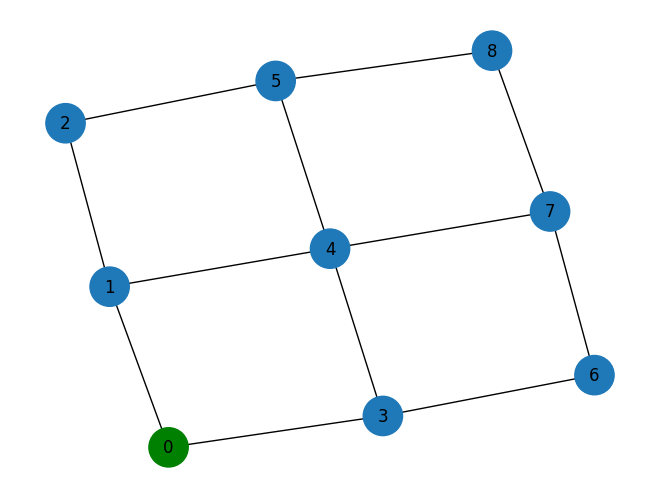

In [4]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

2025-04-28 10:03:27,913: Timeslot 0: Iniciando protocolo Andrew Childs entre Alice 6 e Bob 0.
2025-04-28 10:03:27,915: Limpando a memória do cliente (Alice) antes de iniciar o protocolo.
2025-04-28 10:03:27,916: Limpando a memória do servidor (Bob) antes de iniciar o protocolo.
2025-04-28 10:03:27,918: Cliente criou 4 qubits para a transmissão.
2025-04-28 10:03:27,920: Qubit 737 registrado no timeslot 0
2025-04-28 10:03:27,921: Qubit 154 registrado no timeslot 0
2025-04-28 10:03:27,923: Qubit 75 registrado no timeslot 0
2025-04-28 10:03:27,924: Qubit 743 registrado no timeslot 0
2025-04-28 10:03:27,925: Qubit 737 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-28 10:03:27,926: Qubit 154 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-28 10:03:27,927: Qubit 75 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-28 10:03:27,928: Qubit 743 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-28 10:03:27,929: Alice recebeu 4 qubits. Total: 4 qubits na memória.
2025-04-28 10:03:27,932: Instruçõe

Usando backend: fake_brisbane
Treinando VQC...
Treino finalizado em 28 segundos
Acurácia no treino VQC: 60.71%
Acurácia no teste VQC: 68.42%
Duração do treino VQC: 28 segundos


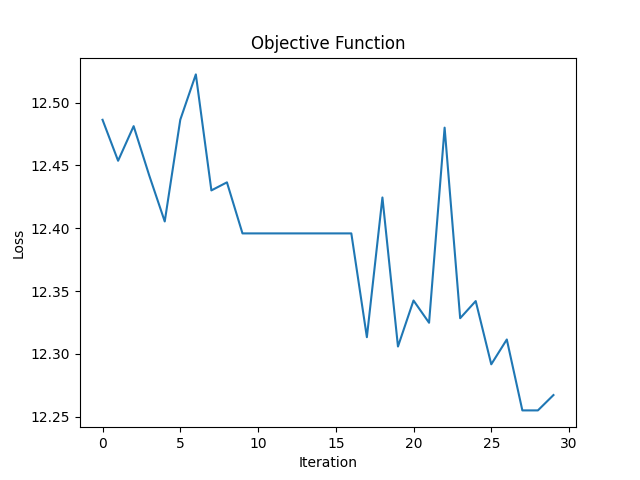

2025-04-28 10:03:57,396: Timeslot 6: Servidor aplicando operações nos qubits.
2025-04-28 10:03:57,397: Timeslot 7: Servidor aplicando operações nos qubits.
2025-04-28 10:03:57,397: Timeslot 8: Servidor aplicando operações nos qubits.
2025-04-28 10:03:57,398: Timeslot 9: Servidor aplicando operações nos qubits.
2025-04-28 10:03:57,399: Servidor aplicou as operações instruídas pelo Cliente nos qubits.
2025-04-28 10:03:57,400: Qubit 737 após operações de Servidor - Estado: 0, Fase: 1
2025-04-28 10:03:57,401: Qubit 154 após operações de Servidor - Estado: 1, Fase: 1
2025-04-28 10:03:57,401: Qubit 75 após operações de Servidor - Estado: 0, Fase: 1
2025-04-28 10:03:57,402: Qubit 743 após operações de Servidor - Estado: 1, Fase: 1
2025-04-28 10:03:57,402: Limpando a memória do cliente antes de receber os qubits devolvidos.
2025-04-28 10:03:57,403: Usando a rota fornecida: [0, 3, 6]
2025-04-28 10:03:57,403: Etapa de retorno: consumindo EPRs existentes na rota [0, 3, 6].
2025-04-28 10:03:57,404

Tempo de Operação: 4


In [5]:
# quantum_circuit, num_qubits, circuit_depth = rede.generate_random_circuit(num_qubits=4, num_gates=20)
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=4,scenario=1,circuit_depth=4,modelo_qml="vqc")